In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Question 1:  Read the column description and ensure you understand each attribute well


In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\supervised learning\graded\Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# There are No Null Values
# There are No Missing Values

In [10]:
df[['Age','Experience','Income','CCAvg','Mortgage']].describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


In [11]:
# experience cannot be a negative value (it must be entry error), so we replace it with the median value

In [12]:
df.loc[df['Experience'] < 0] = df['Experience'].median() 

In [13]:
df[['Experience']].describe()
# to confirm if the negative values are replaced

,Experience
count,5000.000000
mean,20.327600
std,11.253035
min,0.000000
25%,11.000000
50%,20.000000
75%,30.000000
max,43.000000


In [14]:
df.nunique()

ID                    4948
Age                     45
Experience              44
Income                 162
ZIP Code               468
Family                   5
CCAvg                  109
Education                4
Mortgage               348
Personal Loan            3
Securities Account       3
CD Account               3
Online                   3
CreditCard               3
dtype: int64

In [15]:
# ID's have to be unique. We only have 4948 unique IDs. It means we have 52 multiple/duplicate entries. 
# We need to find and drop those entries


Categorical columns: 

Family: Number of Family Members (ordered categorical attribute)

Education: (1:Undergrad); (2:Graduate); (3:Advanced/Professional) (can be taken as ordered categorical attribute)

Securities Account: customer having/not having securities account with the Bank (categorical, not ordered)

CD Account: customer having/not having Certificate of Diposit account with the Bank (categorical, not ordered)

Online: Customer using/ not using Internet banking (categorical, not ordered)

Credit Card: consumer using/not using Credit Card(categorical, not ordered)


Nominal Variables: 

ID: act as an identifire for a customer (must be unique)

ZIP Code: location of the customer's home address (qualitative categorical variable, can be used in prediction model as an attribute)


Numerical Columns: 

Age: Age of customer (ordered numerical attribute)

Experience: professional experience of customer (ordered numnerical attribute)

Income: Annual Income of Customer (ordered numerical attribute)

CCAvg: Avg. Annual expenditure via credit card(ordered numerical attribute)

Mortgage: value of house mortgage (ordered numerical attribute)


Target Variable: 

Personal Loan: The customer availing the loan (0=no loan; 1=loan availed) 

# Question 2. Perform univariate analysis of each and every attribute - use an appropriate plot for a given attribute and mention your insights 

In [16]:
print(df.Family.value_counts())
print(df.Education.value_counts())
print(df['Personal Loan'].value_counts())
print(df['Securities Account'].value_counts())
print(df['CD Account'].value_counts())
print(df['Online'].value_counts())
print(df['CreditCard'].value_counts())

1     1470
2     1274
4     1203
3     1001
20      52
Name: Family, dtype: int64
1     2080
3     1481
2     1387
20      52
Name: Education, dtype: int64
0     4468
1      480
20      52
Name: Personal Loan, dtype: int64
0     4432
1      516
20      52
Name: Securities Account, dtype: int64
0     4646
1      302
20      52
Name: CD Account, dtype: int64
1     2954
0     1994
20      52
Name: Online, dtype: int64
0     3493
1     1455
20      52
Name: CreditCard, dtype: int64


In [17]:
# cearly there are 52 rows that look bogus as all the entries in them is 20
# let's have a look at those rows

In [18]:
df.loc[df['Online'] ==20].head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,20,20,20,20,20,20,20.0,20,20,20,20,20,20,20
226,20,20,20,20,20,20,20.0,20,20,20,20,20,20,20
315,20,20,20,20,20,20,20.0,20,20,20,20,20,20,20
451,20,20,20,20,20,20,20.0,20,20,20,20,20,20,20
524,20,20,20,20,20,20,20.0,20,20,20,20,20,20,20


In [19]:
# we drop these rows as these are of no use for modelling and prediction.
df.drop(df[df['Online']==20].index, inplace = True)

In [20]:
df.loc[df['Online'] ==20].head()
# to confirm that all the rows with '20' as entries in each column are deleted

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


Text(0.5, 0, 'CreditCard')

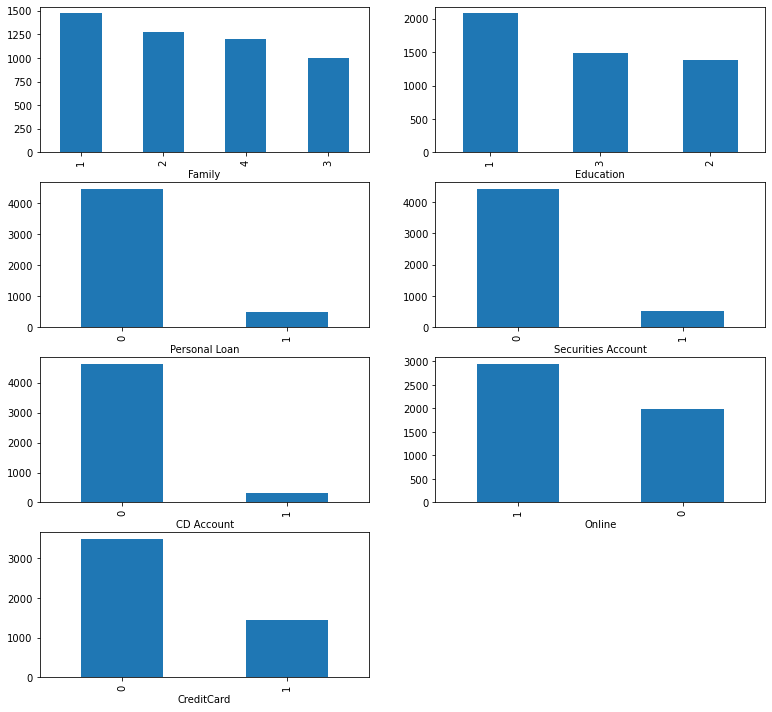

In [21]:
# plotting the categorical attributes' value counts
plt.figure(figsize= (13,22))

plt.subplot(7,2,1)
df.Family.value_counts().plot(kind='bar')
plt.xlabel('Family')


plt.subplot(7,2,2)
df.Education.value_counts().plot(kind='bar')
plt.xlabel('Education')


plt.subplot(7,2,3)
df['Personal Loan'].value_counts().plot(kind='bar')
plt.xlabel('Personal Loan')


plt.subplot(7,2,4)
df['Securities Account'].value_counts().plot(kind='bar')
plt.xlabel('Securities Account')


plt.subplot(7,2,5)
df['CD Account'].value_counts().plot(kind='bar')
plt.xlabel('CD Account')


plt.subplot(7,2,6)
df['Online'].value_counts().plot(kind='bar')
plt.xlabel('Online')


plt.subplot(7,2,7)
df['CreditCard'].value_counts().plot(kind='bar')
plt.xlabel('CreditCard')

plt.show()

C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

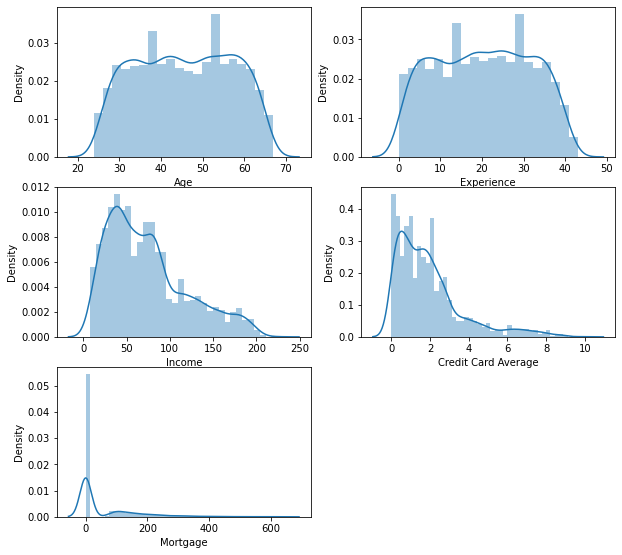

In [22]:
# plotting the numerical attributes

plt.figure(figsize= (10,16))
plt.subplot(5,2,1)
sns.distplot(df['Age'])
plt.xlabel('Age')

plt.subplot(5,2,2)
sns.distplot(df['Experience'])
plt.xlabel('Experience')

plt.subplot(5,2,3)
sns.distplot(df['Income'])
plt.xlabel('Income')

plt.subplot(5,2,4)
sns.distplot(df['CCAvg'])
plt.xlabel('Credit Card Average')

plt.subplot(5,2,5)
sns.distplot(df['Mortgage'])
plt.xlabel('Mortgage')

plt.show()

In [23]:
# we can see that Income, Mortgage and Credit Cad Average are right skewed
# age and experience are normally distributed (but they have multiple peaks)

In [24]:
df[['Age','Experience','Income','CCAvg','Mortgage','Education', 'Family']].describe()

,Age,Experience,Income,CCAvg,Mortgage,Education,Family
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,1.935926,56.634398,1.878941,2.391471
std,11.320735,11.311973,46.112596,1.747694,101.828885,0.839745,1.148444
min,24.000000,0.000000,8.000000,0.000000,0.000000,1.000000,1.000000
25%,36.000000,10.750000,39.000000,0.700000,0.000000,1.000000,1.000000
50%,46.000000,20.000000,64.000000,1.500000,0.000000,2.000000,2.000000
75%,55.000000,30.000000,98.000000,2.600000,101.000000,3.000000,3.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000,3.000000,4.000000


C:\Users\hp\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\New folder\lib\site-packa

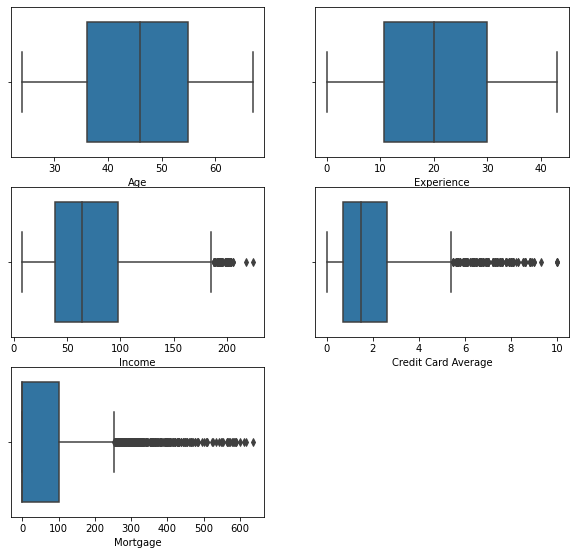

In [25]:
plt.figure(figsize= (10,16))
plt.subplot(5,2,1)
sns.boxplot(df['Age'])
plt.xlabel('Age')

plt.subplot(5,2,2)
sns.boxplot(df['Experience'])
plt.xlabel('Experience')

plt.subplot(5,2,3)
sns.boxplot(df['Income'])
plt.xlabel('Income')

plt.subplot(5,2,4)
sns.boxplot(df['CCAvg'])
plt.xlabel('Credit Card Average')

plt.subplot(5,2,5)
sns.boxplot(df['Mortgage'])
plt.xlabel('Mortgage')

plt.show()

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df[['Income', 'CCAvg','Mortgage']] < (Q1 - 1.5 * IQR)) | (df[['Income', 'CCAvg','Mortgage']] > (Q3 + 1.5 * IQR))).sum()

<ipython-input-26-69f79d8f307e>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df[['Income', 'CCAvg','Mortgage']] < (Q1 - 1.5 * IQR)) | (df[['Income', 'CCAvg','Mortgage']] > (Q3 + 1.5 * IQR))).sum()
<ipython-input-26-69f79d8f307e>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df[['Income', 'CCAvg','Mortgage']] < (Q1 - 1.5 * IQR)) | (df[['Income', 'CCAvg','Mortgage']] > (Q3 + 1.5 * IQR))).sum()


Age                     0
CCAvg                 296
CD Account              0
CreditCard              0
Education               0
Experience              0
Family                  0
ID                      0
Income                 96
Mortgage              288
Online                  0
Personal Loan           0
Securities Account      0
ZIP Code                0
dtype: int64

In [27]:
# The boxplots further establish that there is skewness in the last three columns. The appearing outliers are not
# because of some entry error/ irregularity, but due to the extreme skewness in the data. This is also proven by 
# high number of outlier data. So, we will leave these datapoints as such and normalise the attributes going foreward

In [28]:
# Large proportion of customers have income between 45000 to 550000. 
# average spending oon credit card is between 0 to 10000 and large proportion of customers spends less than 2500.

In [29]:
import statsmodels.api as sm
import scipy.stats as stats

print('Age skewness: ', stats.skew(df.Age))
print('Experience skewness: ',stats.skew(df.Experience))
print('Income skewness: ',stats.skew(df.Income))
print('CCAvg skewness: ',stats.skew(df.CCAvg))
print('Mortgage skewness: ', stats.skew(df.Mortgage))

Age skewness:  -0.02245506696942001
Experience skewness:  -0.014935119166212894
Income skewness:  0.8417486515919316
CCAvg skewness:  1.5941400754690627
Mortgage skewness:  2.103947346760846


In [30]:
df.groupby(df['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2513.152641,45.609893,20.383393,66.194270,93151.398389,2.367726,1.724349,1.840868,51.884736,0.102059,0.036258,0.596016,0.293644
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


Text(0.5, 0, 'Income vs Personal Loan')

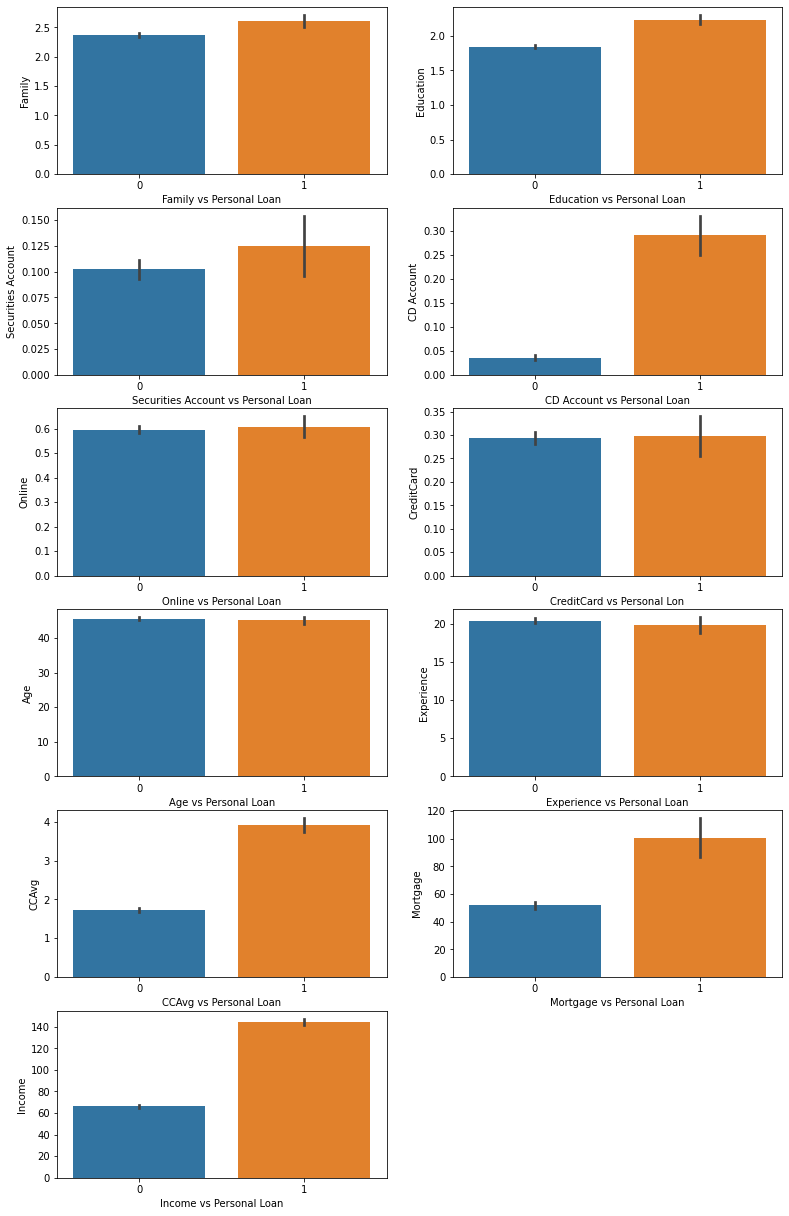

In [31]:
# plotting all the variables against loan/ no loan(personal loan) column

plt.figure(figsize= (13,40))

plt.subplot(11,2,1)
sns.barplot(x="Personal Loan", y="Family", data=df)
plt.xlabel('Family vs Personal Loan')


plt.subplot(11,2,2)
sns.barplot(x="Personal Loan", y="Education", data=df)
plt.xlabel('Education vs Personal Loan')



plt.subplot(11,2,3)
sns.barplot(x="Personal Loan", y="Securities Account", data=df)
plt.xlabel('Securities Account vs Personal Loan')


plt.subplot(11,2,4)
sns.barplot(x="Personal Loan", y="CD Account", data=df)
plt.xlabel('CD Account vs Personal Loan')


plt.subplot(11,2,5)
sns.barplot(x="Personal Loan", y="Online", data=df)
plt.xlabel('Online vs Personal Loan')


plt.subplot(11,2,6)
sns.barplot(x="Personal Loan", y="CreditCard", data=df)
plt.xlabel('CreditCard vs Personal Lon')


plt.subplot(11,2,7)
sns.barplot(x="Personal Loan", y="Age", data=df)
plt.xlabel('Age vs Personal Loan')

plt.subplot(11,2,8)
sns.barplot(x="Personal Loan", y="Experience", data=df)
plt.xlabel('Experience vs Personal Loan')

plt.subplot(11,2,9)
sns.barplot(x="Personal Loan", y="CCAvg", data=df)
plt.xlabel('CCAvg vs Personal Loan')

plt.subplot(11,2,10)
sns.barplot(x="Personal Loan", y="Mortgage", data=df)
plt.xlabel('Mortgage vs Personal Loan')


plt.subplot(11,2,11)
sns.barplot(x="Personal Loan", y="Income", data=df)
plt.xlabel('Income vs Personal Loan')

In [32]:
# average income of those who availed loan is higher than those who didn't availed loan.
# Avg. Value of house mortgage is significantly higher for those who availed loan vs those who didn't 
# Avg. annual apending on Credit Card is significantly higher for those who availed loan vs those who didn't 
# age and experience seem to be equal for both the categories (those who availed the loan and those who didn't)
# customers with CD account and Securities Account are more likely to avail the loan. 

In [33]:
df=df.drop(columns= ['ID'])

# Question 3. Perform correlation analysis among all the variables - you can use Pairplot and Correlation coefficients of every attribute with every other attribute (5 points)

In [34]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994101,-0.058006,-0.029325,-0.039279,-0.050879,0.046222,-0.015184,-0.014204,0.000496,0.003261,0.013542,0.007496
Experience,0.994101,1.000000,-0.049245,-0.028564,-0.045610,-0.048939,0.018243,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.058006,-0.049245,1.000000,-0.014958,-0.155666,0.646178,-0.187992,0.206921,0.504228,-0.002327,0.170171,0.014433,-0.004493
ZIP Code,-0.029325,-0.028564,-0.014958,1.000000,0.011109,-0.002703,-0.017391,0.008264,0.000251,0.003555,0.020149,0.019155,0.007355
Family,-0.039279,-0.045610,-0.155666,0.011109,1.000000,-0.107230,0.064032,-0.020419,0.063088,0.020155,0.015274,0.008466,0.012905
CCAvg,-0.050879,-0.048939,0.646178,-0.002703,-0.107230,1.000000,-0.133939,0.109905,0.369388,0.012477,0.137587,-0.003476,-0.007377
Education,0.046222,0.018243,-0.187992,-0.017391,0.064032,-0.133939,1.000000,-0.032559,0.138339,-0.007508,0.014639,-0.013932,-0.012604
Mortgage,-0.015184,-0.013459,0.206921,0.008264,-0.020419,0.109905,-0.032559,1.000000,0.142322,-0.003717,0.089369,-0.006754,-0.006910
Personal Loan,-0.014204,-0.014121,0.504228,0.000251,0.063088,0.369388,0.138339,0.142322,1.000000,0.022216,0.315769,0.006175,0.002776
Securities Account,0.000496,-0.000457,-0.002327,0.003555,0.020155,0.012477,-0.007508,-0.003717,0.022216,1.000000,0.319056,0.016101,-0.017030


In [35]:
# Age and Experience are heavily correlated (0.99)
# Income and CC Avg are also correlated to a large extent (but we will still use both of them in model building as
# both of them are not totally correlated)
# We can actually drop one of age or experience during the model building

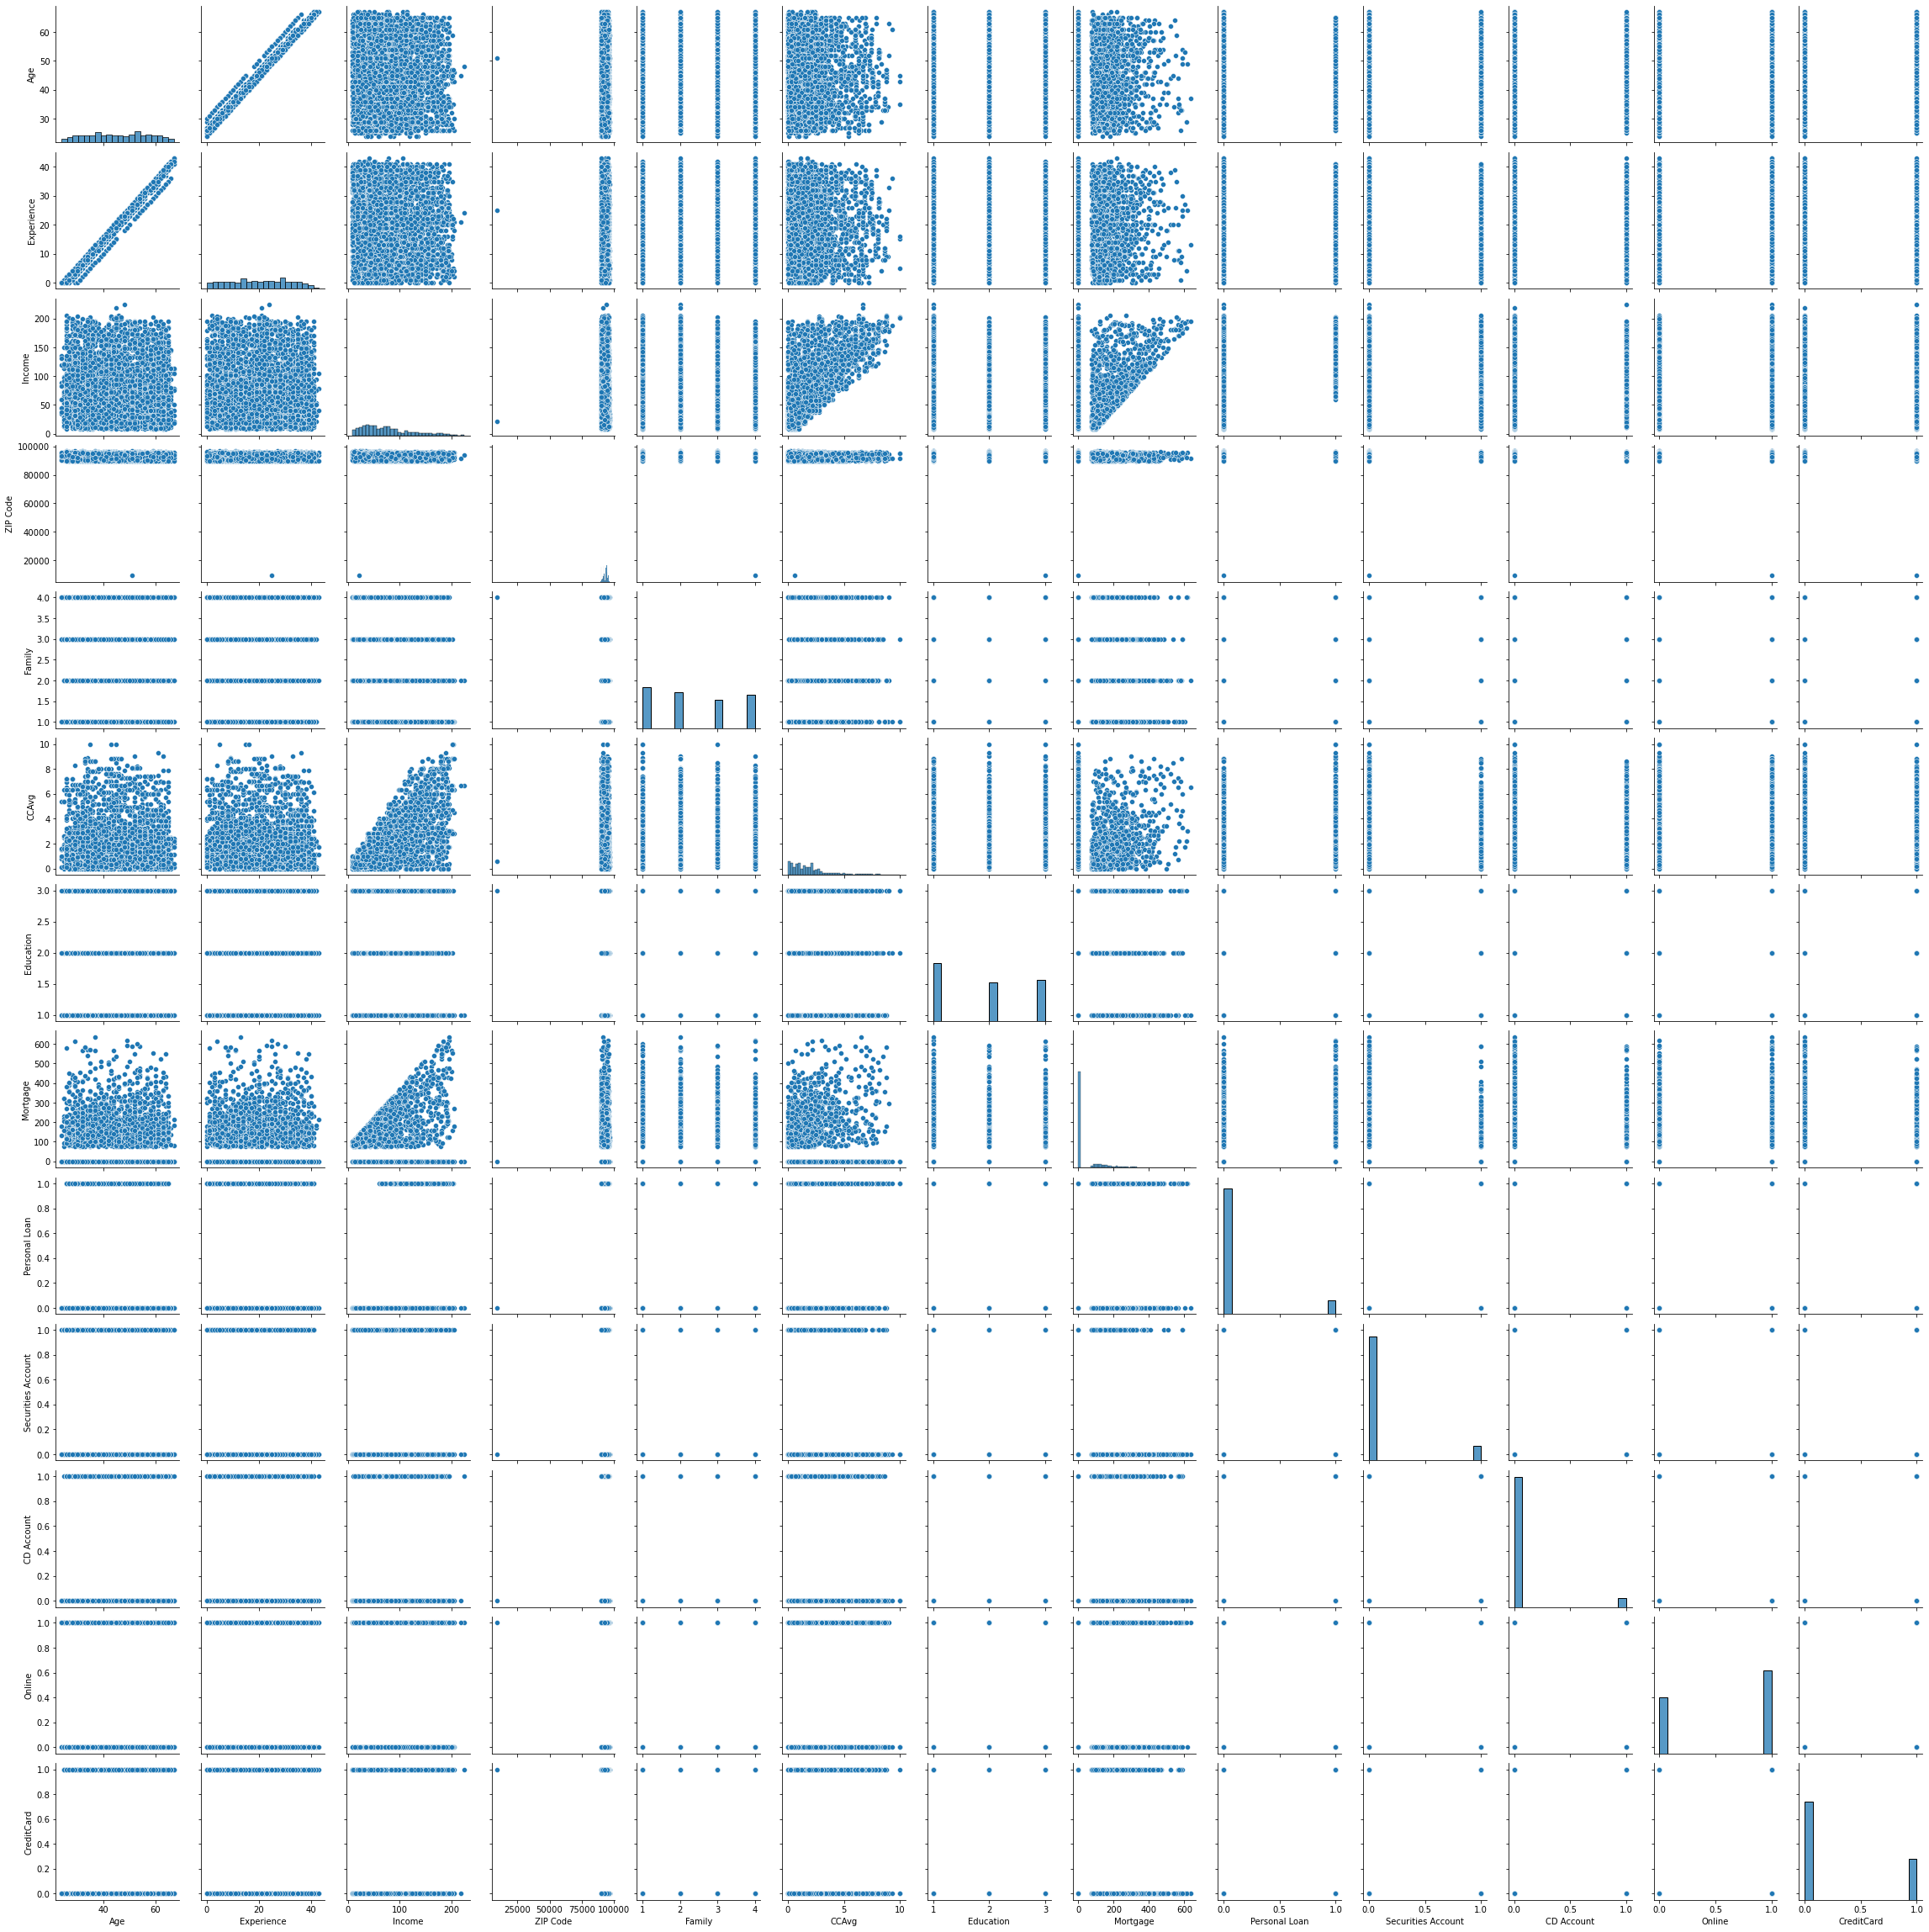

In [36]:
sns.pairplot(df)

In [37]:
# the above viaualisation is not very efficient (as it is not visible clealy, and there are a lot of useless graphs)
# we use the following visualisation (with 'personal loan' as hue)

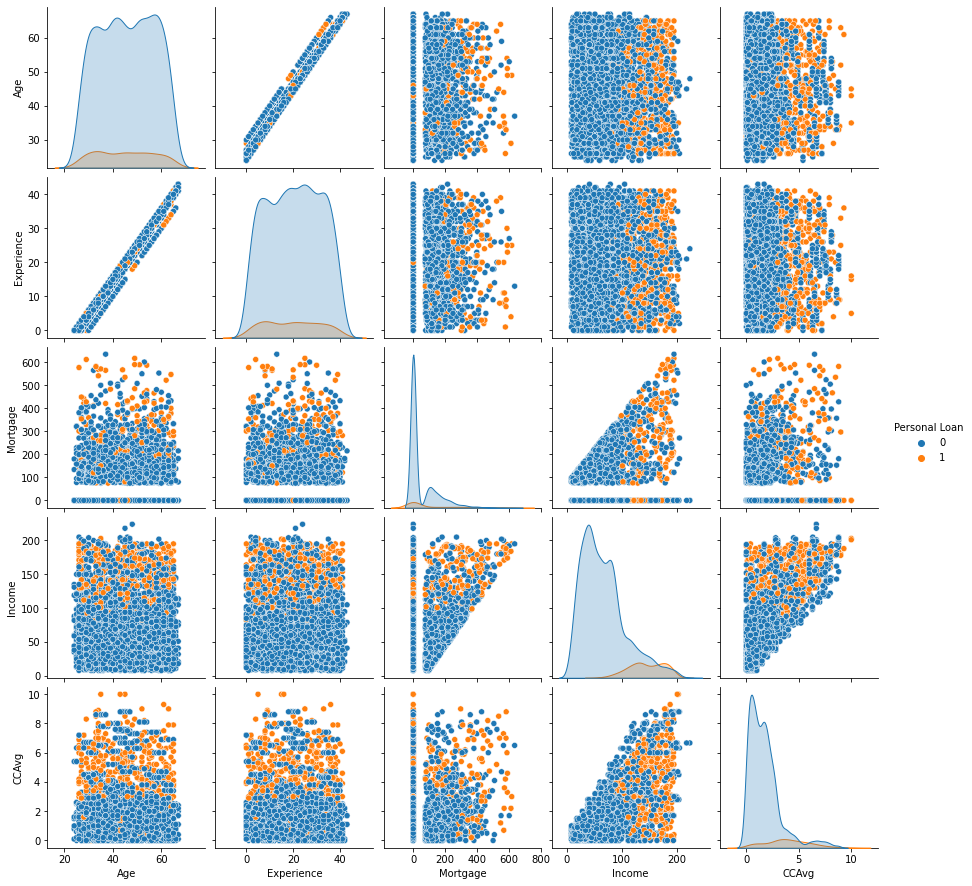

In [38]:
sns.pairplot(df, vars=['Age', 'Experience', 'Mortgage', 'Income', 'CCAvg'], hue='Personal Loan')

In [39]:
# the above graph clearly shows that age and experience are replaceable
# Mortgage and CCAvg are related to income
# loan availing customers have higher income and higher CCAvg 

<AxesSubplot:>

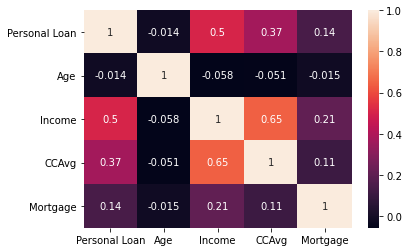

In [40]:
# checking the dependence of personal loan on other numerical variables
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

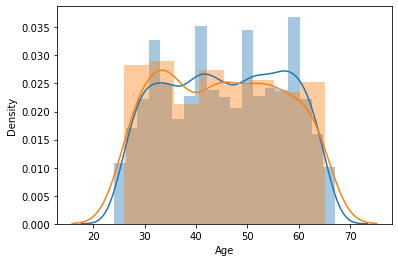

In [41]:
sns.distplot(df[df["Personal Loan"] == 0]['Age'])
sns.distplot(df[df["Personal Loan"] == 1]['Age'])

C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

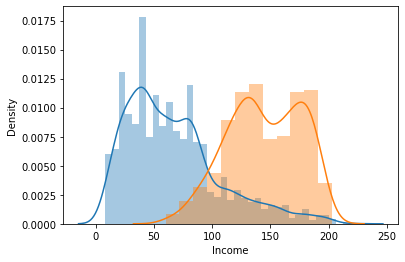

In [42]:
sns.distplot(df[df["Personal Loan"] == 0]['Income'])
sns.distplot(df[df["Personal Loan"] == 1]['Income'])

C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

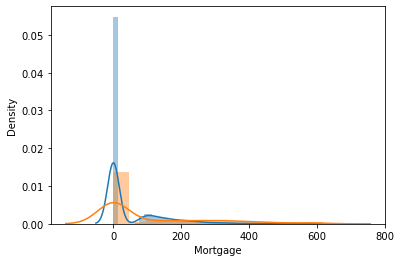

In [43]:
sns.distplot(df[df["Personal Loan"] == 0]['Mortgage'])
sns.distplot(df[df["Personal Loan"] == 1]['Mortgage'])

C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

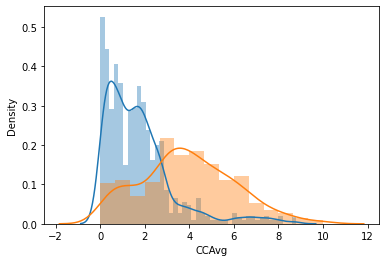

In [44]:
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'])
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'])

In [47]:
# preceding graphs just superimpose our previous interpretation that people with higher Income and CCAvg 
# are more probable to avail personal loan

Text(0.5, 0, 'CreditCard vs Personal Loan')

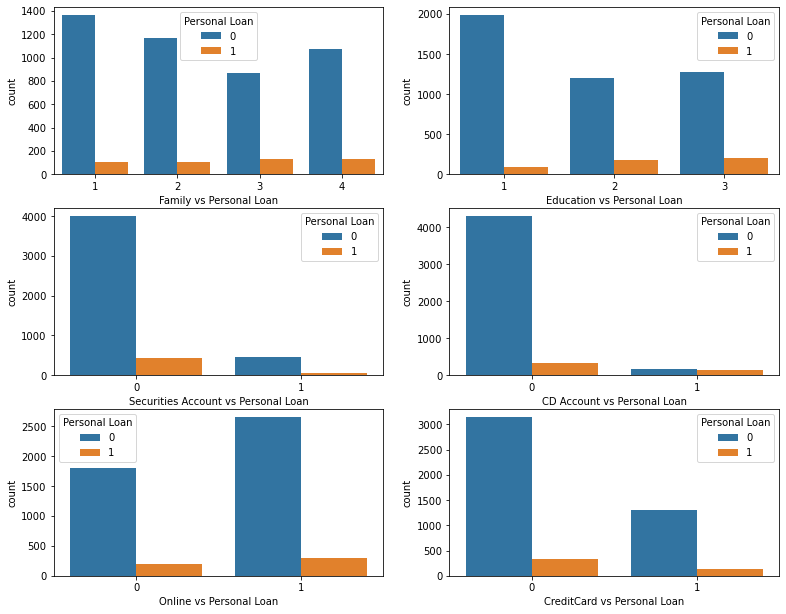

In [48]:
# checking the dependence of personal loan on other categorical variables

plt.figure(figsize= (13,40))

plt.subplot(11,2,1)
sns.countplot(x="Family", data=df ,hue="Personal Loan")
plt.xlabel('Family vs Personal Loan')


plt.subplot(11,2,2)
sns.countplot(x="Education", data=df ,hue="Personal Loan")
plt.xlabel('Education vs Personal Loan')



plt.subplot(11,2,3)
sns.countplot(x="Securities Account", data=df ,hue="Personal Loan")
plt.xlabel('Securities Account vs Personal Loan')

plt.subplot(11,2,4)
sns.countplot(x="CD Account", data=df ,hue="Personal Loan")
plt.xlabel('CD Account vs Personal Loan')


plt.subplot(11,2,5)
sns.countplot(x="Online", data=df ,hue="Personal Loan")
plt.xlabel('Online vs Personal Loan')


plt.subplot(11,2,6)
sns.countplot(x="CreditCard", data=df ,hue="Personal Loan")
plt.xlabel('CreditCard vs Personal Loan')


<AxesSubplot:xlabel='Education', ylabel='Income'>

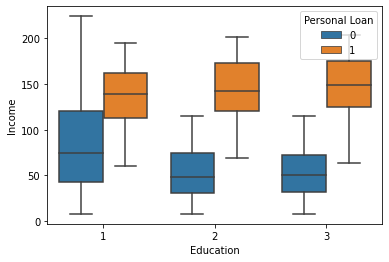

In [49]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan',data=df)

In [ ]:
# As income and education improves, propensity of a customer to avail personal loan increases

C:\Users\hp\New folder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\New folder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\New folder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\New folder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


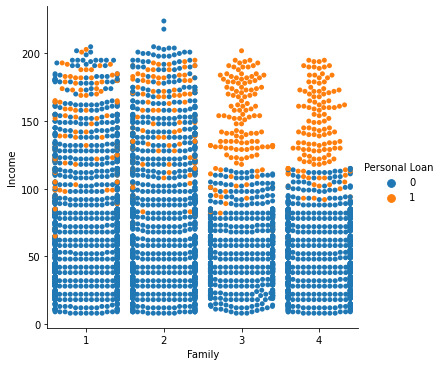

In [50]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

In [ ]:
# larger families with high income almost certainly will avail a personal loan

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

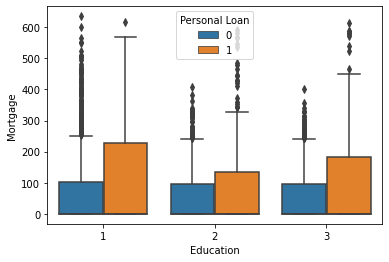

In [51]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

<AxesSubplot:xlabel='CreditCard', ylabel='CCAvg'>

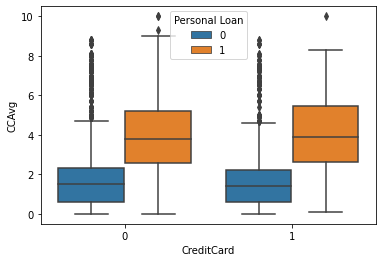

In [52]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df)


# Question 4. One hot encode the Education variable (3 points)


In [53]:
df = pd.get_dummies(df, columns = ['Education'])
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [54]:
df=df.drop(['Experience'], axis=1)
# since experience and age are correlated (0.99), we can drop experience to reduce the complexity of the model

In [55]:
df['ZIP Code'] = df['ZIP Code'].astype('category',copy=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4948 non-null   int64   
 1   Income              4948 non-null   int64   
 2   ZIP Code            4948 non-null   category
 3   Family              4948 non-null   int64   
 4   CCAvg               4948 non-null   float64 
 5   Mortgage            4948 non-null   int64   
 6   Personal Loan       4948 non-null   int64   
 7   Securities Account  4948 non-null   int64   
 8   CD Account          4948 non-null   int64   
 9   Online              4948 non-null   int64   
 10  CreditCard          4948 non-null   int64   
 11  Education_1         4948 non-null   uint8   
 12  Education_2         4948 non-null   uint8   
 13  Education_3         4948 non-null   uint8   
dtypes: category(1), float64(1), int64(9), uint8(3)
memory usage: 598.2 KB


# Question 5. Separate the data into dependant and independent variables and create training and test sets out of them (X_train, y_train, X_test, y_test) (2 points)

In [56]:
from sklearn.model_selection import train_test_split

X= df.drop(labels='Personal Loan', axis=1)
y=df[['Personal Loan']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [57]:
X_train.shape

(3463, 13)

In [58]:
y_train.value_counts()

Personal Loan
0                3128
1                 335
dtype: int64

# Question 6. Use StandardScaler( ) from sklearn, to transform the training and test data into scaled values ( fit the StandardScaler object to the train data and transform train and test data using this object, making sure that the test set does not influence the values of the train set) (5 points)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Question 7. Write a function which takes a model, X_train, X_test, y_train and y_test as input and returns the accuracy, recall, precision, specificity, f1_score of the model trained on the train set and evaluated on the test set (5 points)

In [60]:
def regressor(regtype ,X_train, X_test, y_train, y_test):
    regtype.fit(X_train, y_train)
    y_pred = regtype.predict(X_test)
    accuracy_test=accuracy_score(y_test, y_pred)
    accuracy_train=accuracy_score(y_train, regtype.predict(X_train))
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test, y_pred)    
    f1=f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    cm=confusion_matrix(y_test,y_pred)
    
    return accuracy_test, accuracy_train, precision, recall, specificity, f1, cm 

# Question 8. Employ multiple Classification models (Logistic, K-NN, Naïve Bayes etc) and use the function from step 7 to train and get the metrics of the model

    Logistic Regression

In [61]:
regressor(LogisticRegression(), X_train,X_test,y_train,y_test)

C:\Users\hp\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.958922558922559,
 0.9584175570314756,
 0.8962264150943396,
 0.6551724137931034,
 0.9917910447761195,
 0.756972111553785,
 array([[1329,   11],
        [  50,   95]], dtype=int64))

KNN

In [62]:
regressor(KNeighborsClassifier(), X_train,X_test,y_train,y_test)

C:\Users\hp\New folder\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


(0.9582491582491582,
 0.9691019347386659,
 0.9662921348314607,
 0.593103448275862,
 0.9977611940298508,
 0.735042735042735,
 array([[1337,    3],
        [  59,   86]], dtype=int64))

Naive Bayes

In [63]:
regressor(GaussianNB(), X_train,X_test,y_train,y_test)

C:\Users\hp\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.8909090909090909,
 0.8963326595437482,
 0.4540540540540541,
 0.5793103448275863,
 0.9246268656716418,
 0.5090909090909091,
 array([[1239,  101],
        [  61,   84]], dtype=int64))

# Question 9. Create a dataframe with the columns - “Model”, “accuracy”, “recall”, “precision”, “specificity”, “f1_score”. Populate the dataframe accordingly

In [64]:
data = {'Model':['Gaussian Naive Bayes'], 
        'Accuracy_test':regressor(GaussianNB(), X_train,X_test,y_train,y_test)[0],
        'Accuracy_train':regressor(GaussianNB(), X_train,X_test,y_train,y_test)[1], 
        'Precision':regressor(GaussianNB(), X_train,X_test,y_train,y_test)[2],
       'Recall':regressor(GaussianNB(), X_train,X_test,y_train,y_test)[3],
       'Specificity':regressor(GaussianNB(), X_train,X_test,y_train,y_test)[4],
       'F1_Score':regressor(GaussianNB(), X_train,X_test,y_train,y_test)[5]} 
model_dataframe = pd.DataFrame(data)

C:\Users\hp\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [65]:
data = {'Model':'Logistic Regression', 
        'Accuracy_test':regressor(LogisticRegression(), X_train,X_test,y_train,y_test)[0], 
        'Accuracy_train':regressor(LogisticRegression(), X_train,X_test,y_train,y_test)[1], 
       'Precision':regressor(LogisticRegression(), X_train,X_test,y_train,y_test)[2],
       'Recall':regressor(LogisticRegression(), X_train,X_test,y_train,y_test)[3],
       'Specificity':regressor(LogisticRegression(), X_train,X_test,y_train,y_test)[4],
       'F1_Score':regressor(LogisticRegression(), X_train,X_test,y_train,y_test)[5]} 
model_dataframe= model_dataframe.append(data, ignore_index = True)

C:\Users\hp\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [66]:
data = {'Model':'K-nearest Neighbours classification', 
        'Accuracy_test':regressor(KNeighborsClassifier(), X_train,X_test,y_train,y_test)[0],
        'Accuracy_train':regressor(KNeighborsClassifier(), X_train,X_test,y_train,y_test)[1], 
        'Precision':regressor(KNeighborsClassifier(), X_train,X_test,y_train,y_test)[2],
       'Recall':regressor(KNeighborsClassifier(), X_train,X_test,y_train,y_test)[3],
       'Specificity':regressor(KNeighborsClassifier(), X_train,X_test,y_train,y_test)[4],
       'F1_Score':regressor(KNeighborsClassifier(), X_train,X_test,y_train,y_test)[5]} 
model_dataframe= model_dataframe.append(data, ignore_index = True)

C:\Users\hp\New folder\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\New folder\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\New folder\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\New folder\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

In [67]:
model_dataframe.head()

,Model,Accuracy_test,Accuracy_train,Precision,Recall,Specificity,F1_Score
0,Gaussian Naive Bayes,0.890909,0.896333,0.454054,0.579310,0.924627,0.509091
1,Logistic Regression,0.958923,0.958418,0.896226,0.655172,0.991791,0.756972
2,K-nearest Neighbours classification,0.958249,0.969102,0.966292,0.593103,0.997761,0.735043


In [68]:
#(positive=1 i.e., customer availing the loan)

# precision: TP/(TP+FP)= ratio of true positives to total number of positive claims
    
# recall: TP/(TP+FN)= of all customers availing the loan, how many were correctly predicted

# F1_score: (2*precision*recall)/(precision+recall)
#    = precision (how many instances it classifies correctly), recall (robustness) (it does not miss a significant number of customers)
# Specificity: TN/(TN+FP)=of all customers not availing the loan, how many did we correctly predict.    

# 10. Give your reasoning on which is the best model in this case (5 points)

All three models perform similarly on both the test and train dataset.

Precision for KNN is highest (logistic regression is not so far behind)

Recall for Logistic regression is highest (KNN is not so far behind)

Specificity is the measure of correctly predicting those customers who didn't avail the loan (which is not of prime interest here)

We will judge on the basis of Recall and Precision  (its weighted average is given by F1_Score)

Since F1_Score for Logistic Regression is the highest, we decide that it is the best model in this case. 

Also, KNN is a distance based model which not ideal to classify the target.